## Sistemas de Recomendación

- Los sistemas de recomendación son sistemas implantados desde hace tiempo en páginas web y plataformas de consumo de productos. 
- El objetivo de estos sistemas es encontrar patrones con comportamientos similares para predecir qué podría gustarle al usuario.


**Algunos ejemplos de los sistemas de recomendación son:**
- Las sugerencias de películas o series en Netflix.
- Libros o artículos en Amazon.
- Recomendaciones de restaurantes de Google.
- Recomendaciones de los buscadores de trabajo.
- Recomendaciones de Amistad en FB o LinkedIn.
- Recomendaciones de noticias en sitios Web de periódicos.


**Ventajas de los Sistemas de recomendación:**
- Los usuarios quedan expuestos a diferentes recomendaciones sobre las que podrían estar interesados. Mejorando su experiencia de compra o consumo de servicio.
- Mejora los servicios del proveedor en atención al cliente. 
- Se encuentran relaciones entre productos no vistos antes. 
- Se identifican patrones de consumo.

## Sistemas de Recomendación: Basado en Contenido

- Un sistema basado en recomendación por contenido busca recomendar productos a los usuarios a través de su perfil de consumo.


- Este perfil de usuario gira en torno a sus preferencias y gustos. Se forma en función de las preferencias de los usuarios.


- El proceso de recomendación se basa en la similitud entre estos elementos rankeados por los usuarios. La similitud mide la cercanía de los elementos en función del contenido de los elementos.


- Respecto al contenido del producto, se refiere a propiedades como lacategoría, el género, la duración, el material, etc.

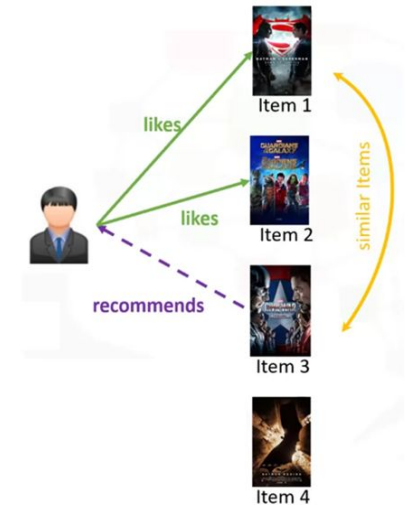

**Supongamos que tenemos un dataset de 6 películas y un usuario ha visto y calificado 3 de las películas, la tarea del sistema de recomendación será recomendar una de las películas candidatas para este usuario.**

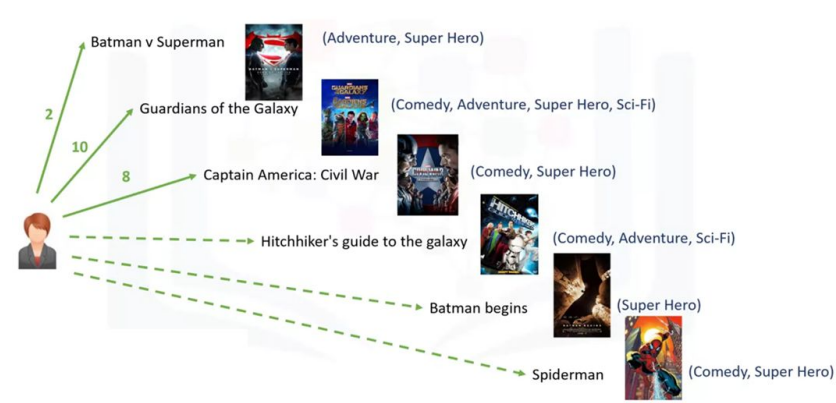

- Primero creamos el perfil de usuario, creando una columna para las películas que ha visto y otra para su calificación.
- Después descomponemos las películas por género como característica del contenido.

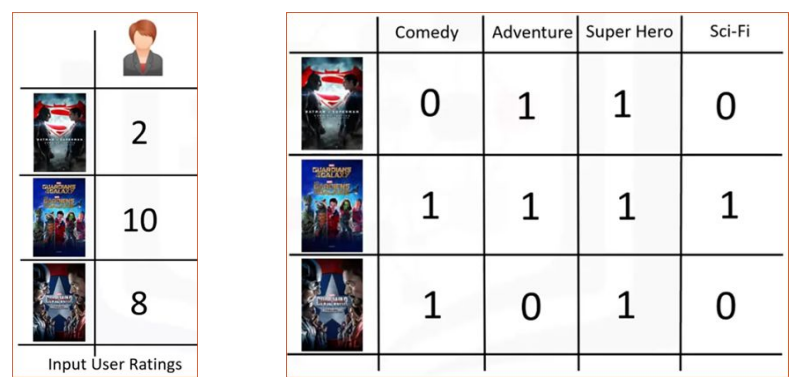

- Si multiplicamos las matrices anteriores, obtendremos el conjunto de pesos por película. Esta matriz también se conoce como **`"Weighted Genre Matrix"`** y representa los intereses del usuario para cada género en función de las películas que está viendo.

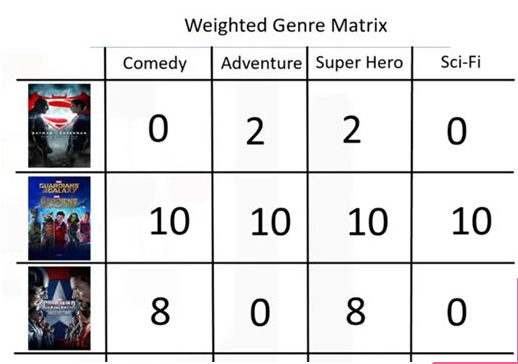

- A partir de la matriz **`"Weighted Genre Matrix"`**, es posible crear el perfil del usuario. Podemos agregar los pesos de cada género, después normalizar y encontrar el **`"perfil de usuario"`**.

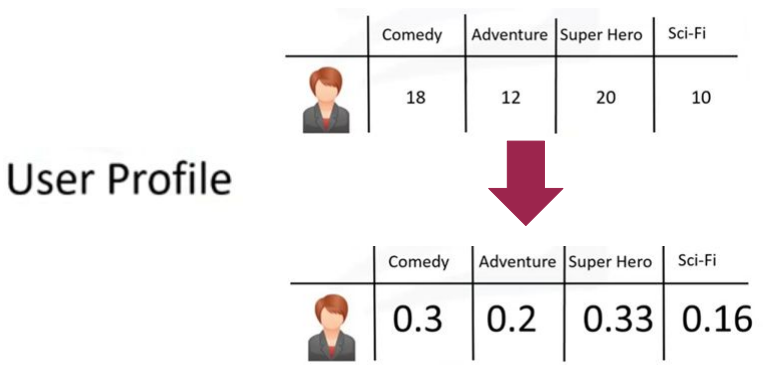

- Por último, podemos multiplicar **`"Perfil de Usuario"`** con la matriz de las peliculas a recomendar **`"Movies Matrix"`**. Esto nos da como resultado **`"Weighted Movies Matrix"`**, luego solo nos quedaría sumar los valores para encontrar la mejor recomendación.

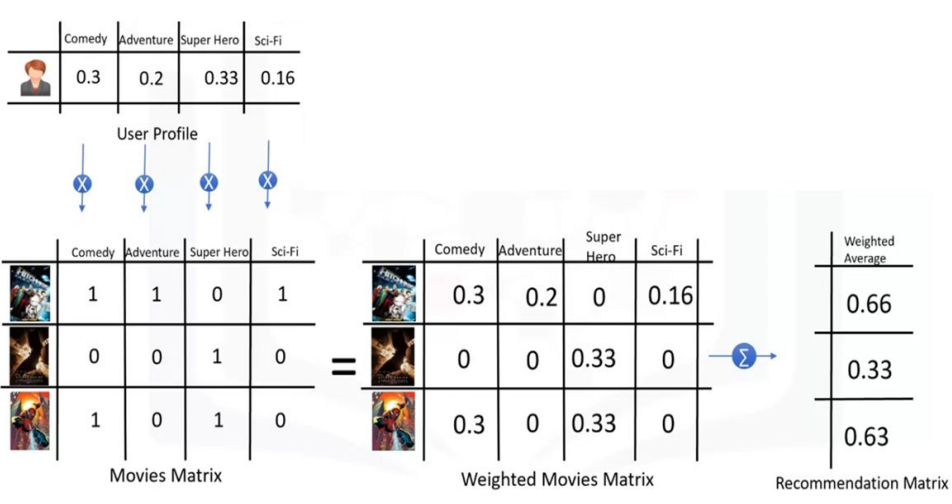

#### Ejemplo:
Utilizando el algoritmo de **Recomendador Basado en Contenido**, encuentra la mejor opción a recomendar con el siguiente **`DataFrame`**:

Sabiendo el puntaje de las primeras 3 peliculas, cual de las siguientes 3 es la mejor para recomendar.

In [1]:
import numpy as np
import pandas as pd

In [2]:
datos = [["Interstellar"         , "Ciencia ficción, Drama, Aventuras"         , 2     ],
         ["El hombre invisible"  , "Terror, Intriga, Ciencia ficción"          , 8     ],
         ["La candidata perfecta", "Drama"                                     , 4     ],
         ["Origen"               , "Ciencia ficción, Thriller, Acción, Intriga", np.nan],
         ["Little Monsters"      , "Comedia, Terror"                           , np.nan],
         ["Mad Max"              , "Acción, Ciencia ficción"                   , np.nan]]

df = pd.DataFrame(data = datos, columns = ["Pelicula", "Genero", "Puntuacion"])

df

,Pelicula,Genero,Puntuacion
0,Interstellar,"Ciencia ficción, Drama, Aventuras",2.0
1,El hombre invisible,"Terror, Intriga, Ciencia ficción",8.0
2,La candidata perfecta,Drama,4.0
3,Origen,"Ciencia ficción, Thriller, Acción, Intriga",NaN
4,Little Monsters,"Comedia, Terror",NaN
5,Mad Max,"Acción, Ciencia ficción",NaN


In [3]:
df_usuario = df[df["Puntuacion"] > 0][["Pelicula", "Puntuacion"]]

df_usuario

,Pelicula,Puntuacion
0,Interstellar,2.0
1,El hombre invisible,8.0
2,La candidata perfecta,4.0


In [4]:
categorias_unicas = list(set(df[df["Puntuacion"] > 0]["Genero"].apply(lambda x : x.split(", ")).sum()))
categorias_unicas

['Intriga', 'Terror', 'Aventuras', 'Ciencia ficción', 'Drama']

In [5]:
datos = list()


for row in df[df["Puntuacion"] > 0]["Genero"].values:

    
    categorias_peliculas = list()
    
    for cat in categorias_unicas:
    
        if cat in row.split(", "):
            categorias_peliculas.append(1)

        else:

            categorias_peliculas.append(0)

    datos.append(categorias_peliculas)
    
datos

[[0, 0, 1, 1, 1], [1, 1, 0, 1, 0], [0, 0, 0, 0, 1]]

In [6]:
df[df["Puntuacion"] > 0]

,Pelicula,Genero,Puntuacion
0,Interstellar,"Ciencia ficción, Drama, Aventuras",2.0
1,El hombre invisible,"Terror, Intriga, Ciencia ficción",8.0
2,La candidata perfecta,Drama,4.0


In [7]:
df_generos_peliculas = pd.DataFrame(data = datos, columns = categorias_unicas)

df_generos_peliculas

,Intriga,Terror,Aventuras,Ciencia ficción,Drama
0,0,0,1,1,1
1,1,1,0,1,0
2,0,0,0,0,1


In [8]:
df_usuario

,Pelicula,Puntuacion
0,Interstellar,2.0
1,El hombre invisible,8.0
2,La candidata perfecta,4.0


In [9]:
weighted_genre_matrix = pd.concat([df_usuario, df_generos_peliculas], axis = 1)
weighted_genre_matrix

,Pelicula,Puntuacion,Intriga,Terror,Aventuras,Ciencia ficción,Drama
0,Interstellar,2.0,0,0,1,1,1
1,El hombre invisible,8.0,1,1,0,1,0
2,La candidata perfecta,4.0,0,0,0,0,1


In [10]:
weighted_genre_matrix = list()

for punto, pelis in zip(df_usuario["Puntuacion"].values, df_generos_peliculas.values):
    weighted_genre_matrix.append(punto*pelis)

In [11]:
weighted_genre_matrix = pd.DataFrame(weighted_genre_matrix, columns = categorias_unicas)

weighted_genre_matrix

,Intriga,Terror,Aventuras,Ciencia ficción,Drama
0,0.0,0.0,2.0,2.0,2.0
1,8.0,8.0,0.0,8.0,0.0
2,0.0,0.0,0.0,0.0,4.0


In [12]:
usuario_pesos = weighted_genre_matrix.sum()

usuario_pesos = usuario_pesos/usuario_pesos.sum()

usuario_pesos

Intriga            0.235294
Terror             0.235294
Aventuras          0.058824
Ciencia ficción    0.294118
Drama              0.176471
dtype: float64

In [13]:
df_recomendacion = df[~(df["Puntuacion"] > 0)]

df_recomendacion

,Pelicula,Genero,Puntuacion
3,Origen,"Ciencia ficción, Thriller, Acción, Intriga",NaN
4,Little Monsters,"Comedia, Terror",NaN
5,Mad Max,"Acción, Ciencia ficción",NaN


In [14]:
datos = list()


for row in df_recomendacion["Genero"].values:

    
    categorias_peliculas = list()
    
    for cat in categorias_unicas:
    
        if cat in row.split(", "):
            categorias_peliculas.append(1)

        else:

            categorias_peliculas.append(0)

    datos.append(categorias_peliculas)
    
datos

[[1, 0, 0, 1, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0]]

In [15]:
df_recom = pd.DataFrame(data = datos, columns = categorias_unicas)

df_recom

,Intriga,Terror,Aventuras,Ciencia ficción,Drama
0,1,0,0,1,0
1,0,1,0,0,0
2,0,0,0,1,0


In [16]:
df_recomendacion = pd.concat([df_recomendacion.reset_index(drop = True), df_recom], axis = 1)

df_recomendacion

,Pelicula,Genero,Puntuacion,Intriga,Terror,Aventuras,Ciencia ficción,Drama
0,Origen,"Ciencia ficción, Thriller, Acción, Intriga",NaN,1,0,0,1,0
1,Little Monsters,"Comedia, Terror",NaN,0,1,0,0,0
2,Mad Max,"Acción, Ciencia ficción",NaN,0,0,0,1,0


In [17]:
weighted_movies_matrix = list()

for punto, pelis in zip(usuario_pesos.values, df_recomendacion.iloc[:, -5:].values):
    weighted_movies_matrix.append(punto*pelis)
    
weighted_movies_matrix

[array([0.23529412, 0.        , 0.        , 0.23529412, 0.        ]),
 array([0.        , 0.23529412, 0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.05882353, 0.        ])]

In [18]:
weighted_movies_matrix = pd.DataFrame(data = weighted_movies_matrix, columns = categorias_unicas)

weighted_movies_matrix

,Intriga,Terror,Aventuras,Ciencia ficción,Drama
0,0.235294,0.000000,0.0,0.235294,0.0
1,0.000000,0.235294,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.058824,0.0


In [19]:
weighted_movies_matrix.sum(axis = 1)

0    0.470588
1    0.235294
2    0.058824
dtype: float64

In [20]:
pd.concat([df_recomendacion, weighted_movies_matrix.sum(axis = 1)], axis = 1).sort_values(0, ascending = False)

,Pelicula,Genero,Puntuacion,Intriga,Terror,Aventuras,Ciencia ficción,Drama,0
0,Origen,"Ciencia ficción, Thriller, Acción, Intriga",NaN,1,0,0,1,0,0.470588
1,Little Monsters,"Comedia, Terror",NaN,0,1,0,0,0,0.235294
2,Mad Max,"Acción, Ciencia ficción",NaN,0,0,0,1,0,0.058824
